In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score

In [3]:
df = pd.read_excel('Preprocessed.xlsx')

In [4]:
df.head()

,T,MO,CT,NI,PB,ET,HF,TA,BS,Degree of Injury
0,1,8,0,1,10,2,14,1,0,0
1,1,7,8,9,10,2,10,1,1,0
2,1,6,0,5,12,14,4,2,0,0
3,0,6,3,21,13,5,14,1,1,1
4,0,6,0,3,20,1,15,1,0,0


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('Degree of Injury', axis=1)
y = df['Degree of Injury']



In [21]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (4847, 9)
Shape of X after SMOTE: (5928, 9)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Degree of Injury, dtype: float64

Accuracy = 0.80
Recall = 0.74

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       737
           1       0.85      0.74      0.79       745

    accuracy                           0.80      1482
   macro avg       0.80      0.80      0.80      1482
weighted avg       0.80      0.80      0.80      1482



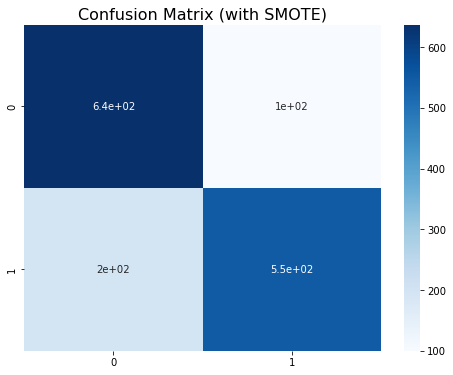

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42)

model = GaussianNB(var_smoothing=0.01519911082952934) #plug in new hyperparameter after doing gridsearch and CV
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');
print(classification_report(y_test,preds))

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-90, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.01519911082952934)


In [42]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(model, X_test, y_test)
print(imps.importances_mean)

[-0.00107962  0.19905533  0.00796221  0.04534413  0.00283401  0.00850202
 -0.00202429  0.00161943  0.00391363]


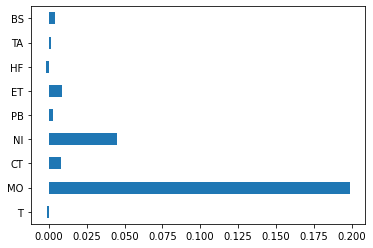

In [48]:
attr = imps.importances_mean
feat_importances = pd.Series(attr, index=X_train.columns)
feat_importances.plot(kind='barh')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X = df[['MO','NI','ET','CT']]
y = df['Degree of Injury']



In [22]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (4847, 4)
Shape of X after SMOTE: (5928, 4)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Degree of Injury, dtype: float64

Accuracy = 0.80
Recall = 0.75

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       737
           1       0.84      0.75      0.79       745

    accuracy                           0.80      1482
   macro avg       0.80      0.80      0.80      1482
weighted avg       0.80      0.80      0.80      1482



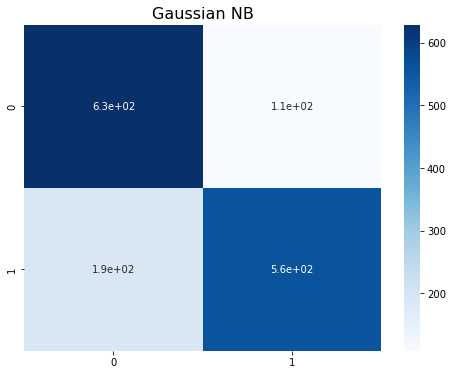

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42)

model = GaussianNB(var_smoothing=0.01519911082952934) #plug in new hyperparameter after doing gridsearch and CV
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Gaussian NB', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');
print(classification_report(y_test,preds))

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-90, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.01519911082952934)
